![logo.png](img/logo.png)

**Students**:
<center>Frank Montalvo Ochoa</center>
<center>Damian Gutierrez</center>

## Montecarlo Integral


In mathematics, and numerical analysis, Monte Carlo methods are known as a numerical integration methods that are based on the use of pseudorandom numbers.

Monte Carlo integration methods are algorithms to find an approximate evaluation of a definite integral, usually of multiple integrals. The deterministic algorithms of numerical integration, to approximate the integral, evaluate the function in a set of points corresponding to a regular grid or in a set of predefined points. Instead, Monte Carlo's methods randomly choose the points at which the function will be evaluated. Monte Carlo integration is part of a family of algorithms generically called Monte Carlo methods. These algorithms use random numbers to solve different types of mathematical problems.

![Pi_30K.gif](img/Pi_30K.gif)

### Steps to the  Montecarlo integrate:    
The Monte Carlo method can be used to numerically approximate the value of a double integral. For a function of two variables the steps are:  
1. Pick n randomly distributed points  $(x_1,y_1),(x_2,y_2)...(x_n,y_n)$ in the rectangle.  
2. Determine the average value of the function  
<center>$ f = \frac{1}{n} \sum_{i=1}^n f(x_i,y_i)  $ </center>
3. Compute the approximation to the integral  
<center>$ \int_a^b (\int_c^d f(x,y) dy) dx = (b-a)*(d-c)*f$ </center>  
4. An estimate for the error is
<center>$ Error = (b-a)*(d-c) \sqrt{\frac{f^2 - (f)^2 }{n}}$ , where:    $f^2 = \frac{1}{n} \sum_{i=1}^n f^2(x_i,y_i) $</center>

### Example of Montecarlo double integral 
<center> $ f(x)= \int_{0}^{1} \int_{1}^{2} \frac{4\cdot x \cdot y - \log(|{x^2 - y^2}|) \cdot \sin({x}) \cdot \cos({y}) + \sqrt{x \cdot y} }{\cos({x}) \cdot \sin({y})} dxdy$</center>

In [4]:
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as pp
from matplotlib import cm
import numpy as np
import random
import math

class Montecarlo:

	def f_xy(self, rndX, rndY, a, b, c, d):
		x = (b - a) * rndX + a
		y = (d - c) * rndY + c
		z = self.f_eval(x, y)
		return z
	
	def f_eval(self, x, y):
		return (4 * x * y - np.log(abs(x**2 - y**2)) * np.sin(x) * np.cos(y) + np.sqrt(x * y)) / (np.cos(x) * np.sin(y))
	
	def integral(self, a, b, c, d, n):
		suma = 0
		suma_aux = 0
		rndX = 0
		rndY = 0
		for i in range(n):
			rndX = random.random()
			rndY = random.random()
			aux = self.f_xy(rndX, rndY, a, b, c, d)
			suma += aux
			suma_aux += aux**2
		error = ((b - a) * (d - c) / n) * suma
		error_aux = (1 / n) * suma_aux
		
		return error, error_aux
	
	def graficar(self):
		fig = pp.figure()
		ax = fig.gca(projection='3d')
		x = np.arange(a, b, 0.1)
		y = np.arange(c, d, 0.1)
		x, y = np.meshgrid(x, y)
		f_xy = self.f_eval(x, y)
		surf = ax.plot_surface(x, y, f_xy, cmap=cm.coolwarm, linewidth=0, antialiased=False)
		ax.zaxis.set_major_locator(LinearLocator(10))
		ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
		ax.view_init(60, 40)

		for x_i in np.arange(a, b, 0.1):
			for y_i in np.arange(c, d, 0.1):
				f_xy_i =  self.f_eval(x_i, y_i)
				for i in np.arange(0, int(f_xy_i), 0.1):
					ax.scatter(x_i, y_i, i, marker="o", color="green",alpha=0.5)
		fig.colorbar(surf, shrink=0.5, aspect=5)
		pp.show()

Resultado: 5.3271 	Error real: 4.8011 	Error esperado: 0.0100 	N: 1
Resultado: 6.1430 	Error real: 2.3641 	Error esperado: 0.0100 	N: 10
Resultado: 5.3043 	Error real: 0.6144 	Error esperado: 0.0100 	N: 100
Resultado: 5.4708 	Error real: 0.2008 	Error esperado: 0.0100 	N: 1000
Resultado: 5.4462 	Error real: 0.0629 	Error esperado: 0.0100 	N: 10000
Resultado: 5.4389 	Error real: 0.0199 	Error esperado: 0.0100 	N: 100000
Resultado: 5.4148 	Error real: 0.0063 	Error esperado: 0.0100 	N: 1000000


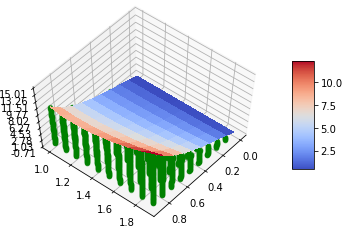

In [5]:
if __name__ == '__main__':
	m = Montecarlo()
	a = 0
	b = 1
	c = 1
	d = 2
	
	n = 1
	error_esperado = 0.01
	error_real = 100
	
	while error_real > error_esperado:
		r1, r2 = m.integral(a, b, c, d, n)
		
		if (r2 - r1) > 0:
			error_real =  (b - a) * (d - c) * math.sqrt((r2-r1)/n)
			print('Resultado:', "{0:.4f}".format(r1), '\tError real:', "{0:.4f}".format(error_real),\
			 '\tError esperado:', "{0:.4f}".format(error_esperado), '\tN:', n)
		
		if error_real > error_esperado:
			n *= 10
			
	m.graficar()

## References:

1. [Module for Monte Carlo Integration](http://mathfaculty.fullerton.edu/mathews/n2003/montecarlomod.html)
2. [Monte Carlo method](https://en.wikipedia.org/wiki/Monte_Carlo_method)